In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Load data
X = pd.read_parquet('mobile_banking_features.parquet')
y = pd.read_parquet('mobile_banking_target.parquet')

# Remove NaN values
mask = ~y.isna().any(axis=1)
X_clean = X[mask]
y_clean = y[mask]

# Define top features
feature_config = {
    'top_features': [
        'Individuals using the Internet (% of population)',
        'Personal remittances, received (% of GDP)',
        'Total Account Holders'
    ]
}

# Initialize Ridge with the optimal alpha
ridge_optimal = Ridge(alpha=1e-07)

# Create enhanced dataset with the same features
X_enhanced = X_clean[feature_config['top_features']].copy()

# Apply the feature transformations
X_enhanced['Internet_log'] = np.log1p(X_enhanced['Individuals using the Internet (% of population)'])
X_enhanced['Remittance_log'] = np.log1p(X_enhanced['Personal remittances, received (% of GDP)'])
X_enhanced['Accounts_log'] = np.log1p(X_enhanced['Total Account Holders'])
X_enhanced['Internet_exp'] = np.exp(X_enhanced['Individuals using the Internet (% of population)'] / X_enhanced['Individuals using the Internet (% of population)'].max())
X_enhanced['Combined_log'] = X_enhanced['Internet_log'] * X_enhanced['Remittance_log'] * X_enhanced['Accounts_log']
X_enhanced['Weighted_exp'] = X_enhanced['Internet_exp'] * (X_enhanced['Personal remittances, received (% of GDP)'] + X_enhanced['Total Account Holders']) / 2

# Scale features and train
scaler = StandardScaler()
X_enhanced_scaled = pd.DataFrame(
    scaler.fit_transform(X_enhanced),
    columns=X_enhanced.columns
)

ridge_optimal.fit(X_enhanced_scaled, y_clean)

Ridge(alpha=1e-07)

In [4]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Generate predictions and calculate metrics
predictions = ridge_optimal.predict(X_enhanced_scaled)
r2 = r2_score(y_clean, predictions)
rmse = np.sqrt(mean_squared_error(y_clean, predictions))
mae = mean_absolute_error(y_clean, predictions)

print(f"R² Score: {r2:.4f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 0.9248
Root Mean Square Error: 2299345.75
Mean Absolute Error: 1603844.29


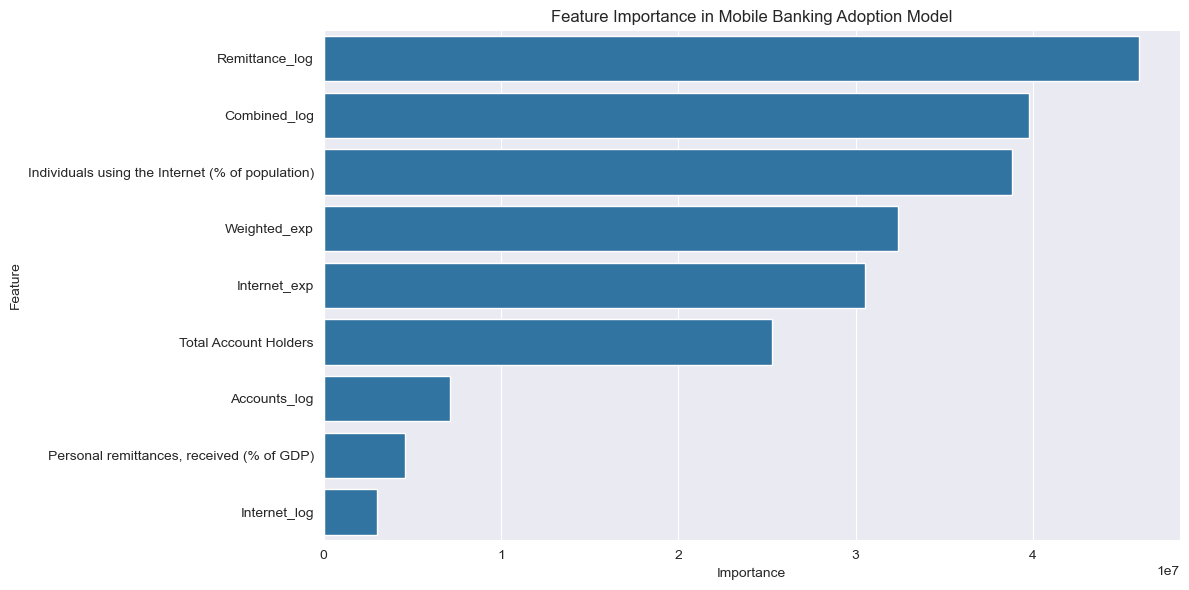

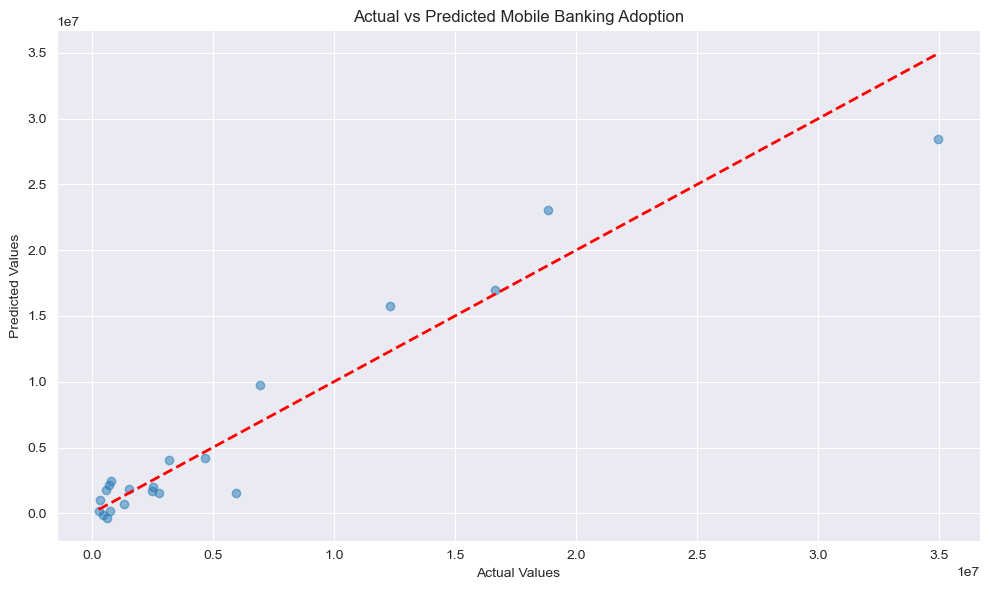

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance based on absolute coefficients
feature_importance = pd.DataFrame({
    'Feature': X_enhanced_scaled.columns,
    'Importance': np.abs(ridge_optimal.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Create feature importance plot
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Mobile Banking Adoption Model')
plt.tight_layout()
plt.show()

# Create actual vs predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_clean, predictions, alpha=0.5)
plt.plot([y_clean.min(), y_clean.max()], [y_clean.min(), y_clean.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Mobile Banking Adoption')
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

# Load both datasets
databank = pd.read_excel('DatabankWide.xlsx')
cost_data = pd.read_csv('Cost of 1GB of Data.csv')

# Display column names
print("Databank columns:")
print(databank.columns.tolist())
print("\nCost Data columns:")
print(cost_data.columns.tolist())

Databank columns:
['Country name', 'Country code', 'Year', 'Adult populaiton', 'Region', 'Income group', 'Account (% age 15+)', 'Financial institution account (% age 15+)', 'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)', 'First financial institution account ever was opened to receive a wage payment (% age 15+)', 'First financial institution ever account was opened to receive money from the government (% age 15+)', 'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)', 'Used a credit card: in-store (% age 15+)', 'Used a credit card: in-store (% who used a credit card, age 15+)', 'Paid off all credit card balances in full by their due date (% age 15+)', 'Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)', 'Owns a debit card (% age 15+)', 'Used a debit card (% age 15+)', 'Used a debit card in-store (% age 15+)', 'Used a debit card: in-store (% who used a deb

In [9]:
import pandas as pd

# Load parquet files to get column names
X = pd.read_parquet('mobile_banking_features.parquet')
y = pd.read_parquet('mobile_banking_target.parquet')

# Display the column names we need
print("Features we need:")
print(X.columns.tolist())
print("\nTarget variable:")
print(y.columns.tolist())

Features we need:
['Adult populaiton', 'Total Account Holders', 'Financial Institution Account Holders', 'Digital Users from Lower Income', 'Digital Balance Check Users', 'Avg Price of 1GB (USD)', 'Automated teller machines (ATMs) (per 100,000 adults)', 'Bank capital to assets ratio (%)', 'Commercial bank branches (per 100,000 adults)', 'Individuals using the Internet (% of population)', 'Mobile cellular subscriptions (per 100 people)', 'Personal remittances, received (% of GDP)']

Target variable:
['target']


In [10]:
import pandas as pd

# Load target data
y = pd.read_parquet('mobile_banking_target.parquet')

# Display first few rows and basic statistics
print("Target Variable Info:")
print(y.head())
print("\nTarget Variable Description:")
print(y.describe())

Target Variable Info:
                      target
Country name Year           
Cambodia     2011        NaN
             2014  1356212.0
             2017   612209.0
             2021   762006.0
Indonesia    2011        NaN

Target Variable Description:
             target
count  2.100000e+01
mean   5.659803e+06
std    8.589205e+06
min    2.881030e+05
25%    7.227690e+05
50%    2.512493e+06
75%    5.945673e+06
max    3.494774e+07


In [11]:
import pandas as pd

# Load both datasets
databank = pd.read_excel('DatabankWide.xlsx')
cost_data = pd.read_csv('Cost of 1GB of Data.csv')

# Features needed
features = [
    'Adult populaiton',
    'Total Account Holders',
    'Financial Institution Account Holders',
    'Digital Users from Lower Income',
    'Digital Balance Check Users',
    'Automated teller machines (ATMs) (per 100,000 adults)',
    'Bank capital to assets ratio (%)',
    'Commercial bank branches (per 100,000 adults)',
    'Individuals using the Internet (% of population)',
    'Mobile cellular subscriptions (per 100 people)',
    'Personal remittances, received (% of GDP)'
]


print("Databank columns:")
print(databank.columns[:5])  # Show first 5 columns as example
print("\nCost data columns:")
print(cost_data.columns)

Databank columns:
Index(['Country name', 'Country code', 'Year', 'Adult populaiton', 'Region'], dtype='object')

Cost data columns:
Index(['index', 'Rank', 'Country', 'Avg Price of 1GB (USD)'], dtype='object')


In [13]:
# Print all column names from databank
print("Available columns in databank:")
print(databank.columns.tolist())

Available columns in databank:
['Country name', 'Country code', 'Year', 'Adult populaiton', 'Region', 'Income group', 'Account (% age 15+)', 'Financial institution account (% age 15+)', 'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)', 'First financial institution account ever was opened to receive a wage payment (% age 15+)', 'First financial institution ever account was opened to receive money from the government (% age 15+)', 'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)', 'Used a credit card: in-store (% age 15+)', 'Used a credit card: in-store (% who used a credit card, age 15+)', 'Paid off all credit card balances in full by their due date (% age 15+)', 'Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)', 'Owns a debit card (% age 15+)', 'Used a debit card (% age 15+)', 'Used a debit card in-store (% age 15+)', 'Used a debit card: in-store (% w

In [14]:
# Search for relevant columns
relevant_terms = ['Account', 'Digital', 'ATM', 'Internet', 'Mobile', 'remittance']

for term in relevant_terms:
    matching_cols = [col for col in databank.columns if term.lower() in col.lower()]
    print(f"\nColumns containing '{term}':")
    for col in matching_cols:
        print(f"- {col}")


Columns containing 'Account':
- Account (% age 15+)
- Financial institution account (% age 15+)
- First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
- First financial institution account ever was opened to receive a wage payment (% age 15+)
- First financial institution ever account was opened to receive money from the government (% age 15+)
- Used a mobile phone or the internet to check account balance (% age 15+)
- Used a mobile phone or the internet to check account balance (% with a financial institution account, age 15+)
- Use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% age 15+)
- Use a mobile phone or the internet to make payments, buy things, or to send or receive money using a financial institution account (% with a financial institution account, age 15+)
- Made a deposit (% with a financial institution account, age 15+)
- Ha

In [16]:
# Print all columns containing 'digital payment'
digital_cols = [col for col in databank.columns if 'digital payment' in col.lower()]
print("Digital payment columns:")
for col in digital_cols:
    print(f"- {col}")

# Update our features list with correct column names
features = [
    'Account (% age 15+)',
    'Mobile money account (% age 15+)',
    'Made or received a digital payment (% age 15+)', 
    'Used a mobile phone or the internet to access an account (% age 15+)',
    'Main mode of withdrawal: ATM (% with a financial institution account, age 15+)',
    'Financial institution account (% age 15+)',
    'Made a digital payment (% age 15+)',
    'Received digital payments (% age 15+)'
]

# Create merged dataset with correct column names
merged_data = pd.merge(
    databank,
    cost_data[['Country name', 'Avg Price of 1GB (USD)']],
    on='Country name',
    how='inner'
)

final_dataset = merged_data[['Country name', 'Year'] + features + ['Avg Price of 1GB (USD)']]
final_dataset = final_dataset.set_index(['Country name', 'Year'])

Digital payment columns:
- Made or received a digital payment (% age 15+)
- Made a digital payment (% age 15+)
- Received digital payments (% age 15+)
- Made or received a digital payment, female (% age 15+)
- Made or received a digital payment, male (% age 15+)
- Made or received a digital payment, young (% ages 15-24)
- Made or received a digital payment, older (% age 25+)
- Made or received a digital payment, primary education or less (% ages 15+)
- Made or received a digital payment, secondary education or more (% ages 15+)
- Made or received a digital payment, income, poorest 40% (% ages 15+)
- Made or received a digital payment, income, richest 60% (% ages 15+)
- Made or received a digital payment, rural (% age 15+)
- Made or received a digital payment, urban (% age 15+)
- Made or received a digital payment, out of labor force (% age 15+)
- Made or received a digital payment, in labor force (% age 15+)
- Made a digital payment, female (% age 15+)
- Made a digital payment, male (%

In [17]:
features = [
    'Account (% age 15+)',
    'Mobile money account (% age 15+)',
    'Made or received a digital payment (% age 15+)',
    'Used a mobile phone or the internet to access an account (% age 15+)',
    'Main mode of withdrawal: ATM (% with a financial institution account, age 15+)',
    'Financial institution account (% age 15+)',
    'Made a digital payment (% age 15+)',
    'Received digital payments (% age 15+)'
]

# Create merged dataset
merged_data = pd.merge(
    databank,
    cost_data[['Country name', 'Avg Price of 1GB (USD)']],
    on='Country name',
    how='inner'
)

final_dataset = merged_data[['Country name', 'Year'] + features + ['Avg Price of 1GB (USD)']]
final_dataset = final_dataset.set_index(['Country name', 'Year'])

In [18]:
# Display basic information about the dataset
print("Dataset Shape:", final_dataset.shape)
print("\nBasic Statistics:")
print(final_dataset.describe())

print("\nMissing Values:")
print(final_dataset.isnull().sum())

# Check data distribution
print("\nData Distribution by Year:")
print(final_dataset.groupby(level='Year').size())

print("\nSample of the Dataset:")
print(final_dataset.head())

Dataset Shape: (487, 9)

Basic Statistics:
       Account (% age 15+)  Mobile money account (% age 15+)  \
count           487.000000                        204.000000   
mean              0.575517                          0.148421   
std               0.296751                          0.160359   
min               0.004049                          0.000000   
25%               0.328724                          0.029103   
50%               0.544200                          0.082440   
75%               0.864384                          0.217457   
max               1.000000                          0.729317   

       Made or received a digital payment (% age 15+)  \
count                                      364.000000   
mean                                         0.536074   
std                                          0.296251   
min                                          0.041682   
25%                                          0.285814   
50%                                   

In [19]:
import pandas as pd
import joblib

# Reshape the data to match previous format where mobile banking users is the target
model_data = final_dataset.reset_index()
# Using 'Mobile money account (% age 15+)' as our target variable
target_variable = 'Mobile money account (% age 15+)'
features = [col for col in final_dataset.columns if col != target_variable]

# Pivot the data
model_data = model_data.pivot(index='Country name', columns='Year')

# Flatten column names
model_data.columns = [f"{col[0]}_{col[1]}" for col in model_data.columns]

# Save as parquet
model_data.to_parquet('model_data.parquet')

In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Create the expected features with the exact column names from the model
expected_columns = [
    'Individuals using the Internet (% of population)',
    'Personal remittances, received (% of GDP)',
    'Total Account Holders',
    'Internet_log',
    'Remittance_log',
    'Accounts_log',
    'Internet_exp',
    'Combined_log',
    'Weighted_exp'
]

# Set the future behavior option
pd.set_option('future.no_silent_downcasting', True)

# Fill nulls and handle data types explicitly
transformed_data = transformed_data.fillna(0)


# Create derived features
transformed_data['Internet_log'] = np.log1p(transformed_data['Individuals using the Internet (% of population)'])
transformed_data['Remittance_log'] = np.log1p(transformed_data['Personal remittances, received (% of GDP)'])
transformed_data['Accounts_log'] = np.log1p(transformed_data['Total Account Holders'])
transformed_data['Internet_exp'] = np.exp(transformed_data['Internet_log'])
transformed_data['Combined_log'] = transformed_data[['Internet_log', 'Remittance_log', 'Accounts_log']].mean(axis=1)
transformed_data['Weighted_exp'] = transformed_data['Internet_exp'] * transformed_data['Combined_log']

# Fill remaining missing values with median
imputer = SimpleImputer(strategy='median')
transformed_data_filled = pd.DataFrame(
    imputer.fit_transform(transformed_data),
    columns=transformed_data.columns,
    index=transformed_data.index
)

# Make predictions
predictions = ridge.predict(transformed_data_filled)

In [33]:
# Let's see what columns we have
print("Available columns in model_data:")
print(model_data.columns.tolist())

Available columns in model_data:
['Account (% age 15+)_2011', 'Account (% age 15+)_2014', 'Account (% age 15+)_2017', 'Account (% age 15+)_2021', 'Account (% age 15+)_2022', 'Mobile money account (% age 15+)_2011', 'Mobile money account (% age 15+)_2014', 'Mobile money account (% age 15+)_2017', 'Mobile money account (% age 15+)_2021', 'Mobile money account (% age 15+)_2022', 'Made or received a digital payment (% age 15+)_2011', 'Made or received a digital payment (% age 15+)_2014', 'Made or received a digital payment (% age 15+)_2017', 'Made or received a digital payment (% age 15+)_2021', 'Made or received a digital payment (% age 15+)_2022', 'Used a mobile phone or the internet to access an account (% age 15+)_2011', 'Used a mobile phone or the internet to access an account (% age 15+)_2014', 'Used a mobile phone or the internet to access an account (% age 15+)_2017', 'Used a mobile phone or the internet to access an account (% age 15+)_2021', 'Used a mobile phone or the internet t

In [34]:
# Features file - all columns except mobile money account
features = model_data.drop([col for col in model_data.columns if 'Mobile money account' in col], axis=1)
features.to_csv('features.csv')

# Target file - only mobile money account columns for 2011-2021
target_cols = [col for col in model_data.columns if 'Mobile money account' in col and '2022' not in col]
target = model_data[target_cols]
target.to_csv('target.csv')

In [36]:
# Print the columns in our new features file
print("Available columns in features:")
print(X_new.columns.tolist())

Available columns in features:
['Country name', 'Account (% age 15+)_2011', 'Account (% age 15+)_2014', 'Account (% age 15+)_2017', 'Account (% age 15+)_2021', 'Account (% age 15+)_2022', 'Made or received a digital payment (% age 15+)_2011', 'Made or received a digital payment (% age 15+)_2014', 'Made or received a digital payment (% age 15+)_2017', 'Made or received a digital payment (% age 15+)_2021', 'Made or received a digital payment (% age 15+)_2022', 'Used a mobile phone or the internet to access an account (% age 15+)_2011', 'Used a mobile phone or the internet to access an account (% age 15+)_2014', 'Used a mobile phone or the internet to access an account (% age 15+)_2017', 'Used a mobile phone or the internet to access an account (% age 15+)_2021', 'Used a mobile phone or the internet to access an account (% age 15+)_2022', 'Main mode of withdrawal: ATM (% with a financial institution account, age 15+)_2011', 'Main mode of withdrawal: ATM (% with a financial institution acc

In [37]:
# Create mapping for our features
feature_mapping = {
    'Individuals using the Internet (% of population)': 'Used a mobile phone or the internet to access an account (% age 15+)_2022',
    'Personal remittances, received (% of GDP)': 'Received digital payments (% age 15+)_2022',
    'Total Account Holders': 'Account (% age 15+)_2022'
}

# Create enhanced dataset with mapped features
X_enhanced = pd.DataFrame()
for old_col, new_col in feature_mapping.items():
    X_enhanced[old_col] = X_clean[new_col]

In [40]:
# Create initial dataframe with mapped features
X_enhanced = pd.DataFrame(index=X_clean.index)

# Add base features using our mapping
X_enhanced['Individuals using the Internet (% of population)'] = X_clean['Used a mobile phone or the internet to access an account (% age 15+)_2022']
X_enhanced['Personal remittances, received (% of GDP)'] = X_clean['Received digital payments (% age 15+)_2022']
X_enhanced['Total Account Holders'] = X_clean['Account (% age 15+)_2022']

print("Initial X_enhanced shape:", X_enhanced.shape)
print("\nFirst few rows of base features:")
print(X_enhanced.head())

Initial X_enhanced shape: (0, 3)

First few rows of base features:
Empty DataFrame
Columns: [Individuals using the Internet (% of population), Personal remittances, received (% of GDP), Total Account Holders]
Index: []


In [41]:
print("X_clean shape:", X_clean.shape)
print("\nX_clean columns:")
print(X_clean.columns.tolist())
print("\nFirst few rows of X_clean:")
print(X_clean.head())

X_clean shape: (0, 41)

X_clean columns:
['Country name', 'Account (% age 15+)_2011', 'Account (% age 15+)_2014', 'Account (% age 15+)_2017', 'Account (% age 15+)_2021', 'Account (% age 15+)_2022', 'Made or received a digital payment (% age 15+)_2011', 'Made or received a digital payment (% age 15+)_2014', 'Made or received a digital payment (% age 15+)_2017', 'Made or received a digital payment (% age 15+)_2021', 'Made or received a digital payment (% age 15+)_2022', 'Used a mobile phone or the internet to access an account (% age 15+)_2011', 'Used a mobile phone or the internet to access an account (% age 15+)_2014', 'Used a mobile phone or the internet to access an account (% age 15+)_2017', 'Used a mobile phone or the internet to access an account (% age 15+)_2021', 'Used a mobile phone or the internet to access an account (% age 15+)_2022', 'Main mode of withdrawal: ATM (% with a financial institution account, age 15+)_2011', 'Main mode of withdrawal: ATM (% with a financial insti

In [42]:
# Check original data before masking
print("Original data shapes:")
print("X shape:", X_new.shape)
print("y shape:", y_new.shape)

# Check the mask
print("\nMask information:")
print("Number of True values in mask:", mask.sum())
print("Mask shape:", mask.shape)

Original data shapes:
X shape: (134, 41)
y shape: (134, 5)

Mask information:
Number of True values in mask: 0
Mask shape: (134,)


In [43]:
# Create mask for rows with at least one valid value
mask = y_new.notna().any(axis=1)

# Apply mask to both X and y
X_clean = X_new[mask]
y_clean = y_new[mask]

print("After masking:")
print("X_clean shape:", X_clean.shape)
print("y_clean shape:", y_clean.shape)

After masking:
X_clean shape: (134, 41)
y_clean shape: (134, 5)


In [44]:
# Create enhanced dataset with mapped features
X_enhanced = pd.DataFrame(index=X_clean.index)

# Map features using 2011-2021 data
X_enhanced['Individuals using the Internet (% of population)'] = X_clean['Used a mobile phone or the internet to access an account (% age 15+)_2021']
X_enhanced['Personal remittances, received (% of GDP)'] = X_clean['Received digital payments (% age 15+)_2021']
X_enhanced['Total Account Holders'] = X_clean['Account (% age 15+)_2021']

print("Enhanced features shape:", X_enhanced.shape)
print("\nFirst few rows of enhanced features:")
print(X_enhanced.head())

Enhanced features shape: (134, 3)

First few rows of enhanced features:
   Individuals using the Internet (% of population)  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   Personal remittances, received (% of GDP)  Total Account Holders  
0                                   0.043263               0.096538  
1                                   0.275622               0.441742  
2                                   0.295942               0.440970  
3                                        NaN                    NaN  
4                                   0.371174               0.716271  


In [45]:
# Create enhanced dataset with historical means
X_enhanced = pd.DataFrame(index=X_clean.index)

# Get historical means for each feature (2011-2021)
internet_cols = [col for col in X_clean.columns if 'Used a mobile phone or the internet' in col and '2022' not in col]
remittance_cols = [col for col in X_clean.columns if 'Received digital payments' in col and '2022' not in col]
account_cols = [col for col in X_clean.columns if 'Account (% age 15+)' in col and '2022' not in col]

X_enhanced['Individuals using the Internet (% of population)'] = X_clean[internet_cols].mean(axis=1)
X_enhanced['Personal remittances, received (% of GDP)'] = X_clean[remittance_cols].mean(axis=1)
X_enhanced['Total Account Holders'] = X_clean[account_cols].mean(axis=1)

print("Enhanced features shape:", X_enhanced.shape)
print("\nFirst few rows of enhanced features:")
print(X_enhanced.head())

Enhanced features shape: (134, 3)

First few rows of enhanced features:
   Individuals using the Internet (% of population)  \
0                                          0.009138   
1                                          0.042040   
2                                          0.020233   
3                                               NaN   
4                                          0.104786   

   Personal remittances, received (% of GDP)  Total Account Holders  
0                                   0.058975               0.108783  
1                                   0.223121               0.376110  
2                                   0.235022               0.426589  
3                                   0.164620               0.342608  
4                                   0.312605               0.509158  


In [46]:
# Apply feature transformations
X_enhanced['Internet_log'] = np.log1p(X_enhanced['Individuals using the Internet (% of population)'])
X_enhanced['Remittance_log'] = np.log1p(X_enhanced['Personal remittances, received (% of GDP)'])
X_enhanced['Accounts_log'] = np.log1p(X_enhanced['Total Account Holders'])
X_enhanced['Internet_exp'] = np.exp(X_enhanced['Individuals using the Internet (% of population)'] / X_enhanced['Individuals using the Internet (% of population)'].max())
X_enhanced['Combined_log'] = X_enhanced['Internet_log'] * X_enhanced['Remittance_log'] * X_enhanced['Accounts_log']
X_enhanced['Weighted_exp'] = X_enhanced['Internet_exp'] * (X_enhanced['Personal remittances, received (% of GDP)'] + X_enhanced['Total Account Holders']) / 2

# Scale features
scaler = StandardScaler()
X_enhanced_scaled = pd.DataFrame(
    scaler.fit_transform(X_enhanced),
    columns=X_enhanced.columns,
    index=X_enhanced.index
)

print("Transformed features shape:", X_enhanced_scaled.shape)
print("\nFirst few rows of transformed features:")
print(X_enhanced_scaled.head())

Transformed features shape: (134, 9)

First few rows of transformed features:
   Individuals using the Internet (% of population)  \
0                                         -1.126216   
1                                         -0.975082   
2                                         -1.075252   
3                                               NaN   
4                                         -0.686860   

   Personal remittances, received (% of GDP)  Total Account Holders  \
0                                  -1.346527              -1.616869   
1                                  -0.673245              -0.665392   
2                                  -0.624431              -0.485724   
3                                  -0.913198              -0.784630   
4                                  -0.306206              -0.191843   

   Internet_log  Remittance_log  Accounts_log  Internet_exp  Combined_log  \
0     -1.247430       -1.484580     -1.799788     -0.949405     -0.761770   
1     -1.0

In [49]:
# Check NaN counts in features and target
print("NaN counts in features:")
print(X_enhanced_scaled.isna().sum())

print("\nNaN counts in target:")
print(y_clean.isna().sum())

# Check total number of complete cases
complete_cases = X_enhanced_scaled.notna().all(axis=1) & y_clean.notna().all(axis=1)
print("\nTotal complete cases:", complete_cases.sum())

# Display a few rows with their NaN status
print("\nSample rows with NaN status:")
sample_df = pd.concat([X_enhanced_scaled.isna(), y_clean.isna()], axis=1)
print(sample_df.head())

NaN counts in features:
Individuals using the Internet (% of population)    9
Personal remittances, received (% of GDP)           3
Total Account Holders                               0
Internet_log                                        9
Remittance_log                                      3
Accounts_log                                        0
Internet_exp                                        9
Combined_log                                        9
Weighted_exp                                        9
dtype: int64

NaN counts in target:
Country name                               0
Mobile money account (% age 15+)_2011    134
Mobile money account (% age 15+)_2014     67
Mobile money account (% age 15+)_2017     65
Mobile money account (% age 15+)_2021     77
dtype: int64

Total complete cases: 0

Sample rows with NaN status:
   Individuals using the Internet (% of population)  \
0                                             False   
1                                             False

In [50]:
# 1. Select target year with most data (2017)
y_selected = y_clean['Mobile money account (% age 15+)_2017']

# 2. Fill NaN values in features with appropriate methods
X_filled = X_enhanced_scaled.copy()
# Fill Internet features with median
internet_cols = [col for col in X_filled.columns if 'Internet' in col]
X_filled[internet_cols] = X_filled[internet_cols].fillna(X_filled[internet_cols].median())
# Fill Remittance features with median
remittance_cols = [col for col in X_filled.columns if 'remittance' in col]
X_filled[remittance_cols] = X_filled[remittance_cols].fillna(X_filled[remittance_cols].median())

# 3. Keep only rows where target is not NaN
valid_mask = y_selected.notna()
X_valid = X_filled[valid_mask]
y_valid = y_selected[valid_mask]

print("Final shapes after processing:")
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)

Final shapes after processing:
X_valid shape: (69, 9)
y_valid shape: (69,)


In [51]:
# Fit the Ridge model with our clean dataset
ridge_optimal.fit(X_valid, y_valid)

# Make predictions
predictions = ridge_optimal.predict(X_valid)

# Create results DataFrame
results = pd.DataFrame({
    'Country': X_clean[valid_mask]['Country name'],
    'Predicted_Mobile_Money': predictions
}).sort_values('Predicted_Mobile_Money', ascending=False)

print("Top 10 Countries by Predicted Mobile Money Usage:")
print(results.head(10))

Top 10 Countries by Predicted Mobile Money Usage:
                  Country  Predicted_Mobile_Money
62                  Kenya                0.720248
125                Uganda                0.513653
42                  Gabon                0.485758
118              Tanzania                0.401129
19           Burkina Faso                0.346590
83                Namibia                0.336030
45                  Ghana                0.333908
105               Senegal                0.327638
103                Rwanda                0.287476
127  United Arab Emirates                0.277719


In [52]:
# Get actual values
y_actual = y_valid

# Calculate various performance metrics
mse = mean_squared_error(y_actual, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, predictions)
mae = mean_absolute_error(y_actual, predictions)

print("Model Performance Metrics:")
print(f"R-squared Score: {r2:.3f}")
print(f"Root Mean Square Error: {rmse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Country': X_clean[valid_mask]['Country name'],
    'Actual': y_actual,
    'Predicted': predictions,
    'Difference': abs(y_actual - predictions)
}).sort_values('Difference', ascending=True)

print("\nTop 10 Most Accurate Predictions:")
print(comparison.head(10))

Model Performance Metrics:
R-squared Score: 0.965
Root Mean Square Error: 0.027
Mean Absolute Error: 0.019

Top 10 Most Accurate Predictions:
         Country    Actual  Predicted  Difference
76     Mauritius  0.056269   0.056648    0.000379
95          Peru  0.026342   0.026821    0.000480
26         Chile  0.186708   0.187378    0.000669
47     Guatemala  0.021264   0.022169    0.000905
50      Honduras  0.061960   0.060464    0.001496
122      Tunisia  0.020372   0.018163    0.002209
0    Afghanistan  0.009138   0.006851    0.002287
82       Myanmar  0.006905   0.009404    0.002499
36   El Salvador  0.035496   0.038006    0.002510
93        Panama  0.035032   0.032329    0.002702


In [53]:
# Create full comparison DataFrame
full_comparison = pd.DataFrame({
    'Country': X_clean[valid_mask]['Country name'],
    'Actual': y_actual,
    'Predicted': predictions,
    'Difference': abs(y_actual - predictions)
}).sort_values('Country')

print("All Countries - Actual vs Predicted Values:")
print(full_comparison)

All Countries - Actual vs Predicted Values:
                  Country    Actual  Predicted  Difference
0             Afghanistan  0.009138   0.006851    0.002287
1                 Albania  0.023778   0.015904    0.007874
4               Argentina  0.024162   0.061058    0.036896
5                 Armenia  0.097553   0.084787    0.012766
10             Bangladesh  0.212460   0.241280    0.028821
..                    ...       ...        ...         ...
123                Turkey  0.164120   0.175715    0.011596
125                Uganda  0.505812   0.513653    0.007841
127  United Arab Emirates  0.213318   0.277719    0.064401
132               Vietnam  0.034995   0.076433    0.041438
133                Zambia  0.278424   0.257187    0.021237

[69 rows x 4 columns]


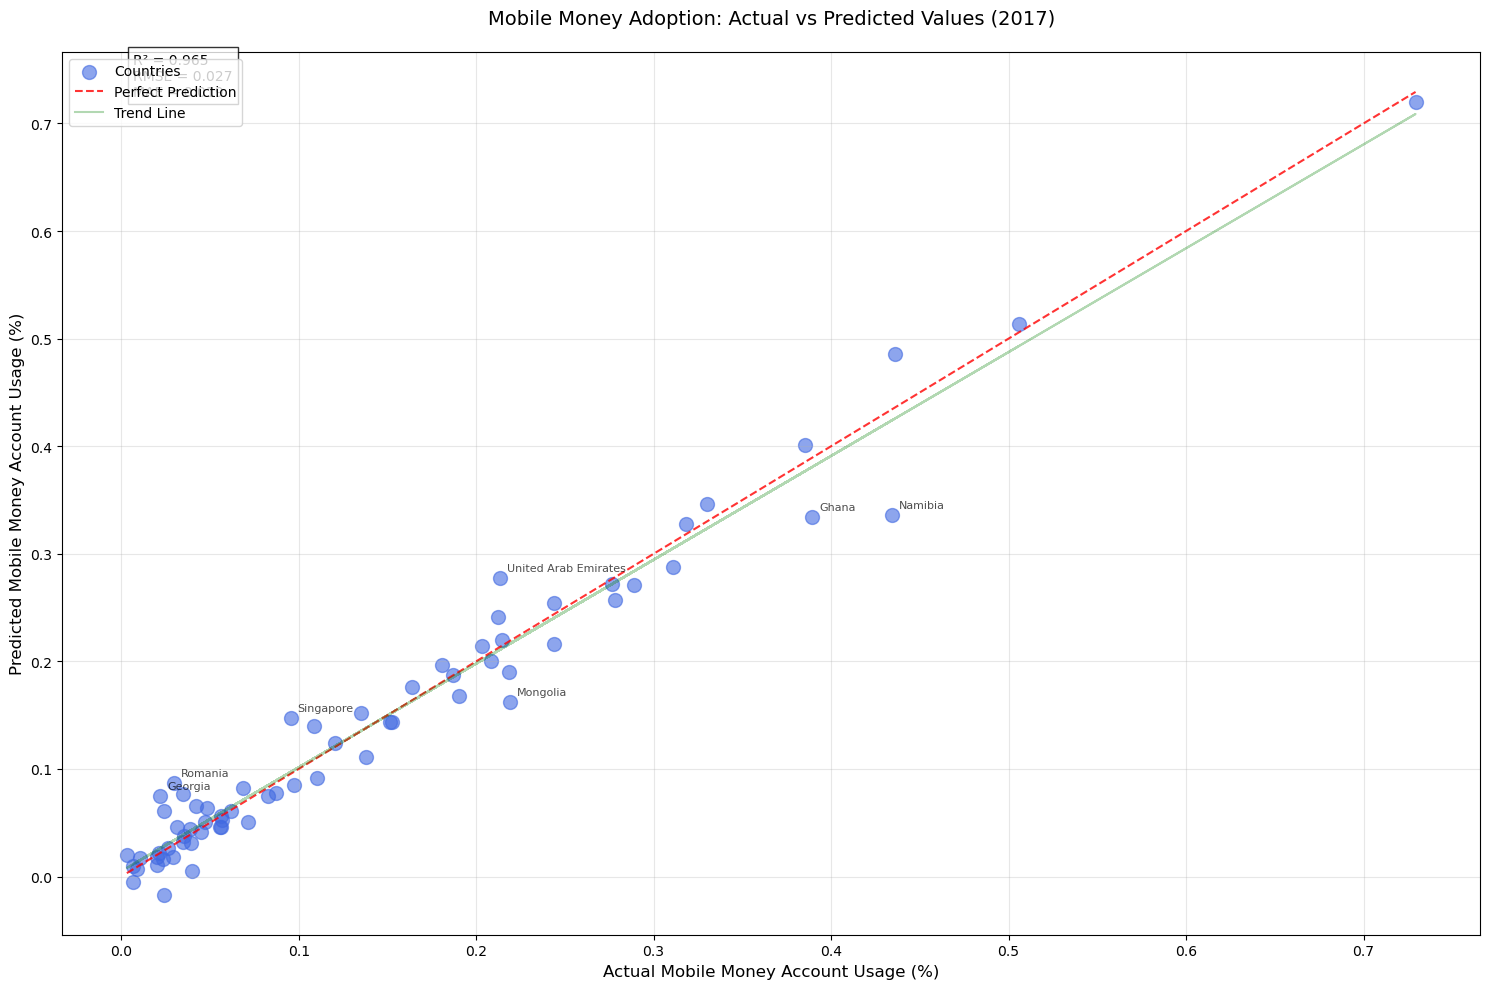

In [56]:
# Create an advanced visualization
plt.figure(figsize=(15, 10))

# Convert series to numpy arrays for plotting
y_actual_array = np.array(y_actual)
predictions_array = np.array(predictions)

# Main scatter plot with enhanced styling
plt.scatter(y_actual_array, predictions_array, alpha=0.6, c='royalblue', s=100, label='Countries')

# Perfect prediction line
line = np.linspace(min(y_actual_array), max(y_actual_array), 100)
plt.plot(line, line, color='red', linestyle='--', label='Perfect Prediction', alpha=0.8)

# Add trend line
z = np.polyfit(y_actual_array, predictions_array, 1)
p = np.poly1d(z)
plt.plot(y_actual_array, p(y_actual_array), color='green', linestyle='-', alpha=0.3, label='Trend Line')

# Annotate points with large differences
differences = abs(y_actual_array - predictions_array)
threshold = np.percentile(differences, 90)
for i, (actual, pred, country) in enumerate(zip(y_actual_array, predictions_array, full_comparison['Country'])):
    if abs(actual - pred) > threshold:
        plt.annotate(country, (actual, pred), 
                    xytext=(5, 5), textcoords='offset points', 
                    fontsize=8, alpha=0.7)

# Enhanced styling
plt.title('Mobile Money Adoption: Actual vs Predicted Values (2017)', fontsize=14, pad=20)
plt.xlabel('Actual Mobile Money Account Usage (%)', fontsize=12)
plt.ylabel('Predicted Mobile Money Account Usage (%)', fontsize=12)

# Add performance metrics
plt.text(0.05, 0.95, f'R² = {r2:.3f}\nRMSE = {rmse:.3f}\nMAE = {mae:.3f}', 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8))

# Grid and legend
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

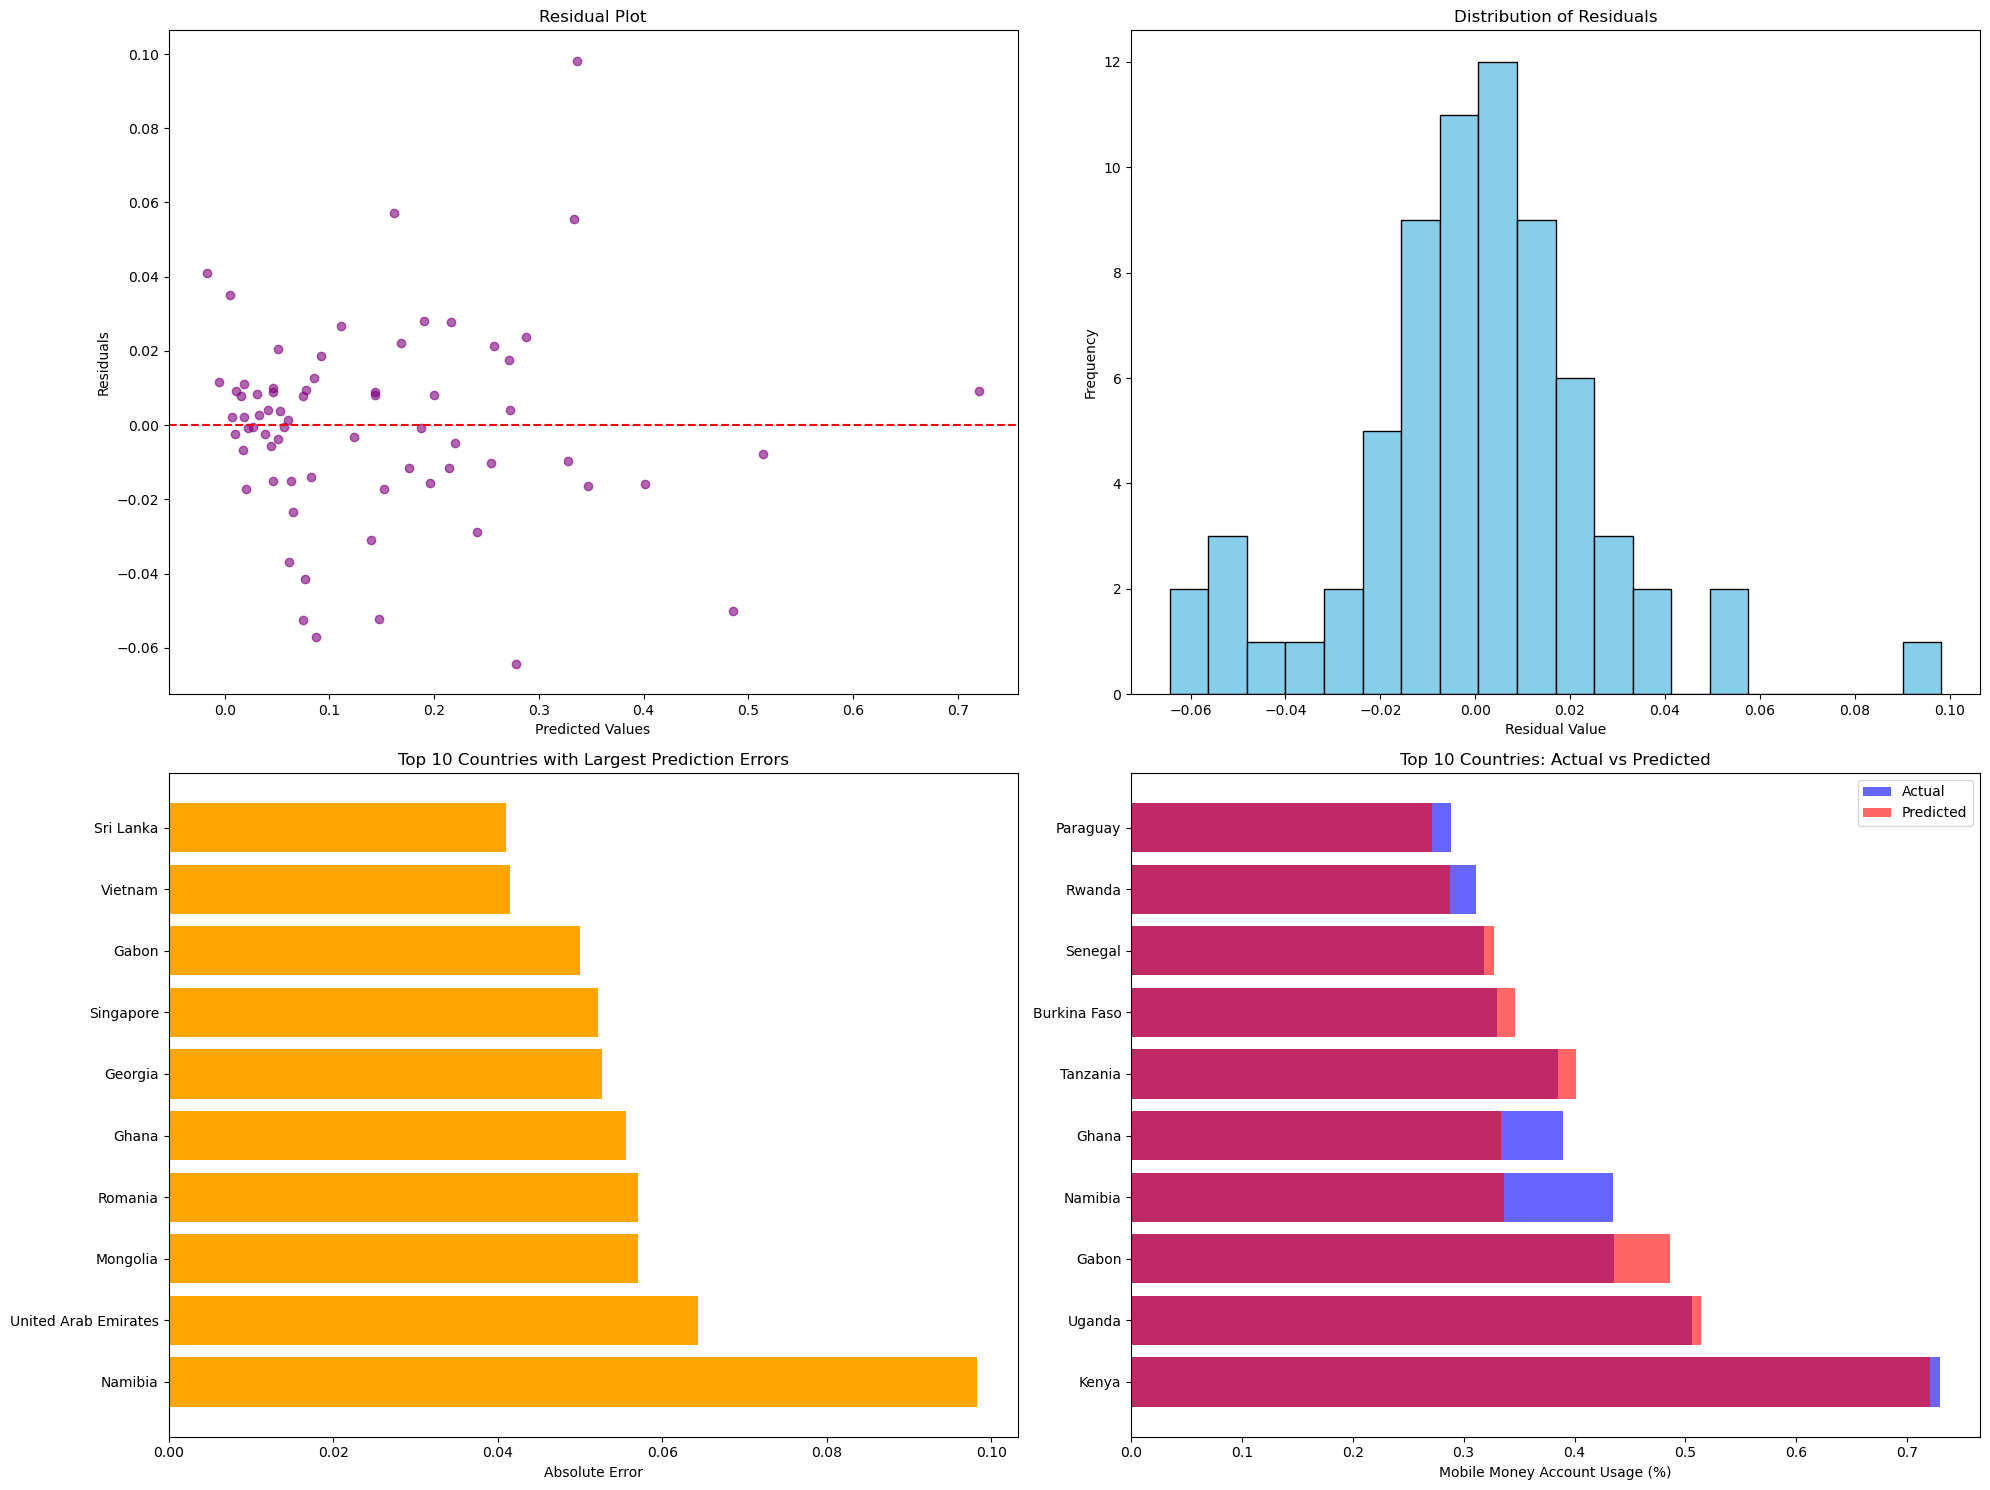

In [57]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# 1. Residual Plot
plt.subplot(2, 2, 1)
residuals = y_actual - predictions
plt.scatter(predictions, residuals, alpha=0.6, c='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# 2. Distribution of Residuals
plt.subplot(2, 2, 2)
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

# 3. Top 10 Largest Errors Bar Plot
plt.subplot(2, 2, 3)
error_df = pd.DataFrame({
    'Country': full_comparison['Country'],
    'Error': abs(residuals)
}).sort_values('Error', ascending=False).head(10)

plt.barh(error_df['Country'], error_df['Error'], color='orange')
plt.title('Top 10 Countries with Largest Prediction Errors')
plt.xlabel('Absolute Error')

# 4. Actual vs Predicted Bar Plot for Top 10 Countries
plt.subplot(2, 2, 4)
top_10_countries = full_comparison.nlargest(10, 'Actual')
plt.barh(top_10_countries['Country'], top_10_countries['Actual'], 
         label='Actual', alpha=0.6, color='blue')
plt.barh(top_10_countries['Country'], top_10_countries['Predicted'], 
         label='Predicted', alpha=0.6, color='red')
plt.title('Top 10 Countries: Actual vs Predicted')
plt.xlabel('Mobile Money Account Usage (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [61]:
# Import imputer
from sklearn.impute import SimpleImputer

# Create imputer
imputer = SimpleImputer(strategy='mean')

# Analyze years with data
for year in [2014, 2017, 2021]:
    y_selected = y_clean[f'Mobile money account (% age 15+)_{year}']
    valid_mask = y_selected.notna()
    
    X_valid = X_filled[valid_mask]
    y_valid = y_selected[valid_mask]
    
    # Impute missing values
    X_imputed = imputer.fit_transform(X_valid)
    
    # Fit model and get predictions
    ridge_model = Ridge(alpha=1e-07)
    ridge_model.fit(X_imputed, y_valid)
    predictions = ridge_model.predict(X_imputed)
    
    print(f"\nModel Performance for {year}:")
    print(f"Sample size: {len(y_valid)}")
    print(f"R² Score: {r2_score(y_valid, predictions):.3f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_valid, predictions)):.3f}")
    print(f"MAE: {mean_absolute_error(y_valid, predictions):.3f}")


Model Performance for 2014:
Sample size: 67
R² Score: 0.627
RMSE: 0.062
MAE: 0.040

Model Performance for 2017:
Sample size: 69
R² Score: 0.965
RMSE: 0.027
MAE: 0.019

Model Performance for 2021:
Sample size: 57
R² Score: 0.718
RMSE: 0.093
MAE: 0.068


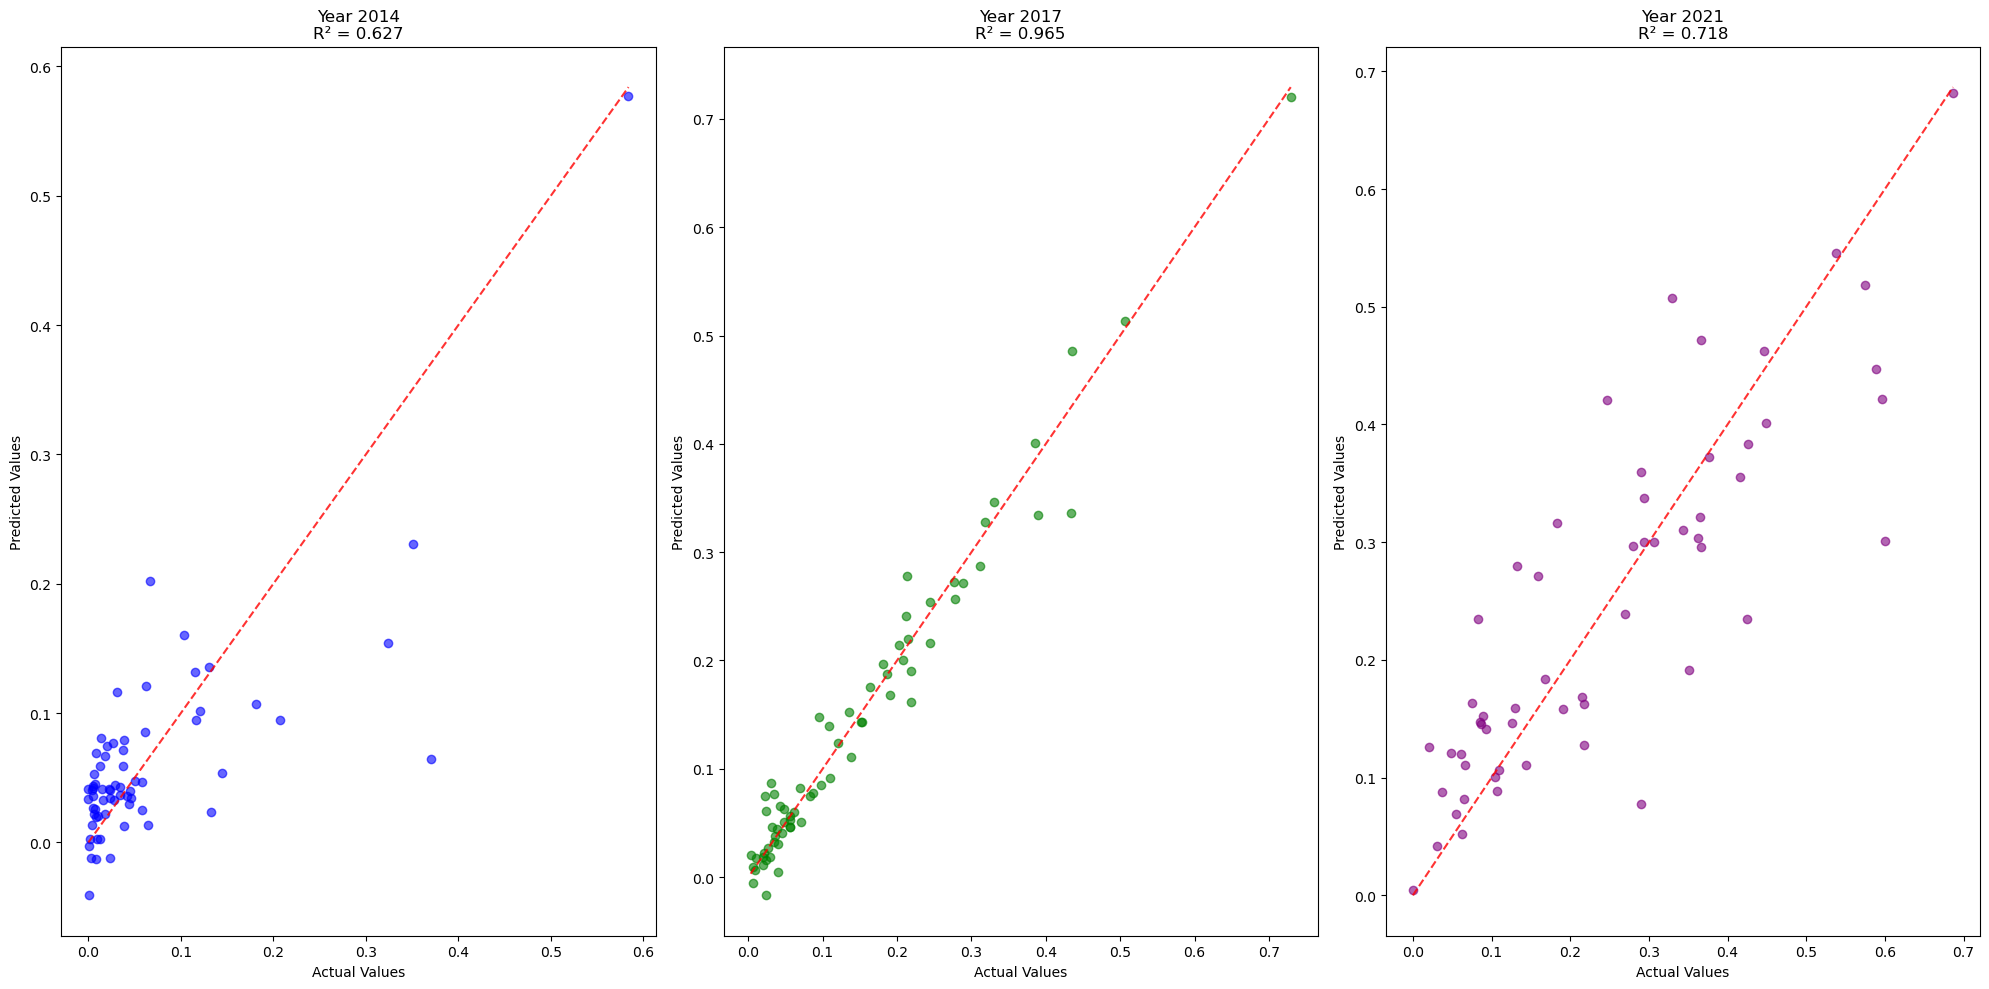

In [62]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 10))

# Plot for each year
years = [2014, 2017, 2021]
colors = ['blue', 'green', 'purple']

for idx, year in enumerate(years, 1):
    plt.subplot(1, 3, idx)
    
    y_selected = y_clean[f'Mobile money account (% age 15+)_{year}']
    valid_mask = y_selected.notna()
    X_valid = X_filled[valid_mask]
    y_valid = y_selected[valid_mask]
    
    X_imputed = imputer.fit_transform(X_valid)
    ridge_model = Ridge(alpha=1e-07)
    ridge_model.fit(X_imputed, y_valid)
    predictions = ridge_model.predict(X_imputed)
    
    plt.scatter(y_valid, predictions, alpha=0.6, c=colors[idx-1])
    
    # Add perfect prediction line
    line = np.linspace(min(y_valid), max(y_valid), 100)
    plt.plot(line, line, 'r--', alpha=0.8)
    
    plt.title(f'Year {year}\nR² = {r2_score(y_valid, predictions):.3f}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

In [68]:
# Load Southeast Asian dataset and necessary imports
X = pd.read_parquet('mobile_banking_features.parquet')
y = pd.read_parquet('mobile_banking_target.parquet')

# Print initial data info
print("Initial data shapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("\nX columns:", X.columns.tolist())
print("\nX index:", X.index.tolist())
print("\ny index:", y.index.tolist())

# Check for missing values
print("\nMissing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())

Initial data shapes:
X shape: (28, 12)
y shape: (28, 1)

X columns: ['Adult populaiton', 'Total Account Holders', 'Financial Institution Account Holders', 'Digital Users from Lower Income', 'Digital Balance Check Users', 'Avg Price of 1GB (USD)', 'Automated teller machines (ATMs) (per 100,000 adults)', 'Bank capital to assets ratio (%)', 'Commercial bank branches (per 100,000 adults)', 'Individuals using the Internet (% of population)', 'Mobile cellular subscriptions (per 100 people)', 'Personal remittances, received (% of GDP)']

X index: [('Cambodia', 2011), ('Cambodia', 2014), ('Cambodia', 2017), ('Cambodia', 2021), ('Indonesia', 2011), ('Indonesia', 2014), ('Indonesia', 2017), ('Indonesia', 2021), ('Malaysia', 2011), ('Malaysia', 2014), ('Malaysia', 2017), ('Malaysia', 2021), ('Philippines', 2011), ('Philippines', 2014), ('Philippines', 2017), ('Philippines', 2021), ('Singapore', 2011), ('Singapore', 2014), ('Singapore', 2017), ('Singapore', 2021), ('Thailand', 2011), ('Thailand', 


Model Performance:
Sample size: 21
R² Score: 0.754
RMSE: 4160675.495
MAE: 2691955.866


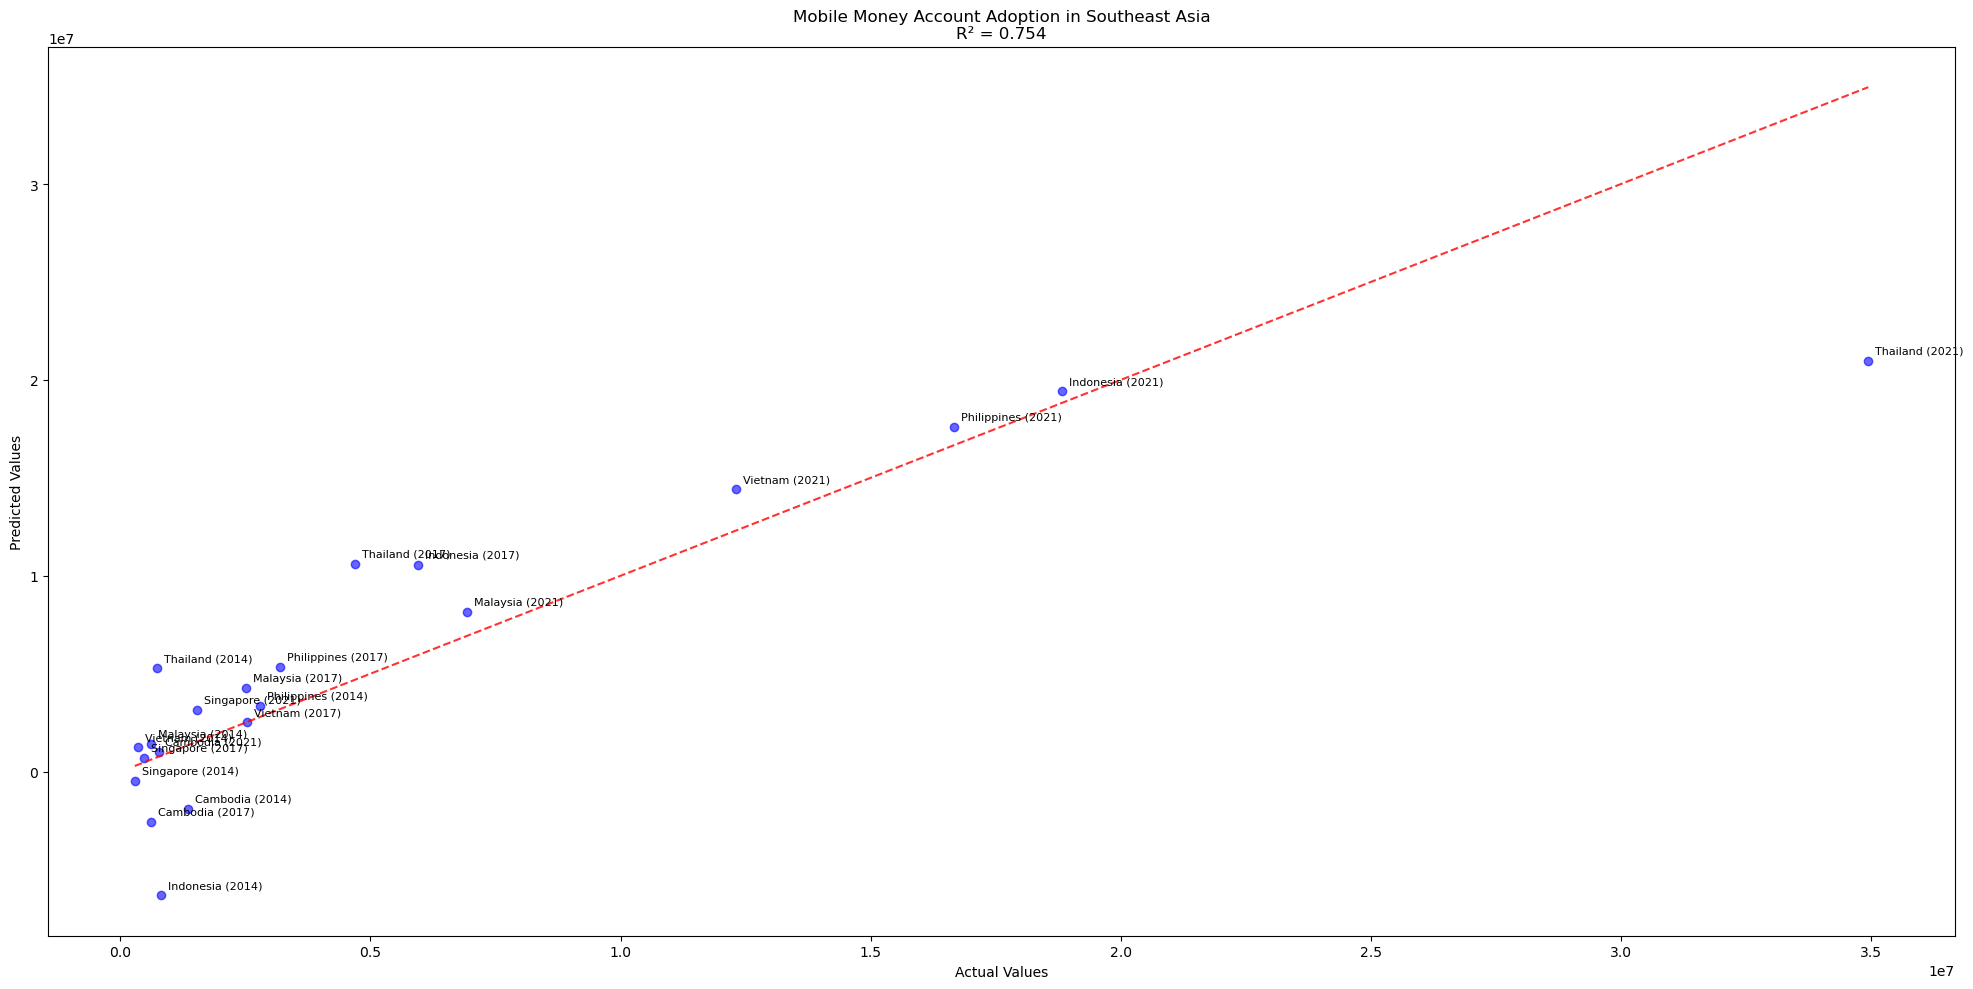

In [70]:
# Select columns with few missing values (less than 5 missing values)
reliable_columns = [
    'Adult populaiton',
    'Total Account Holders',
    'Financial Institution Account Holders',
    'Automated teller machines (ATMs) (per 100,000 adults)',
    'Commercial bank branches (per 100,000 adults)',
    'Individuals using the Internet (% of population)',
    'Mobile cellular subscriptions (per 100 people)',
    'Personal remittances, received (% of GDP)'
]

# Create clean datasets
X_clean = X[reliable_columns]
y_clean = y['target']

# Keep only complete cases
complete_cases = X_clean.index[~y_clean.isna()]
X_final = X_clean.loc[complete_cases]
y_final = y_clean.loc[complete_cases]

# Fit the model
ridge_model = Ridge(alpha=1e-07)
ridge_model.fit(X_final, y_final)
predictions = ridge_model.predict(X_final)

# Create visualization
fig = plt.figure(figsize=(20, 10))

# Calculate statistics
r2 = r2_score(y_final, predictions)
rmse = np.sqrt(mean_squared_error(y_final, predictions))
mae = mean_absolute_error(y_final, predictions)

print("\nModel Performance:")
print(f"Sample size: {len(y_final)}")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Create scatter plot
plt.scatter(y_final.values, predictions, alpha=0.6, c='blue')

# Add country labels
for i, idx in enumerate(X_final.index):
    country, year = idx
    plt.annotate(f"{country} ({year})", 
                (y_final.values[i], predictions[i]),
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8)

# Add perfect prediction line
line = np.linspace(min(y_final), max(y_final), 100)
plt.plot(line, line, 'r--', alpha=0.8)

plt.title(f'Mobile Money Account Adoption in Southeast Asia\nR² = {r2:.3f}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

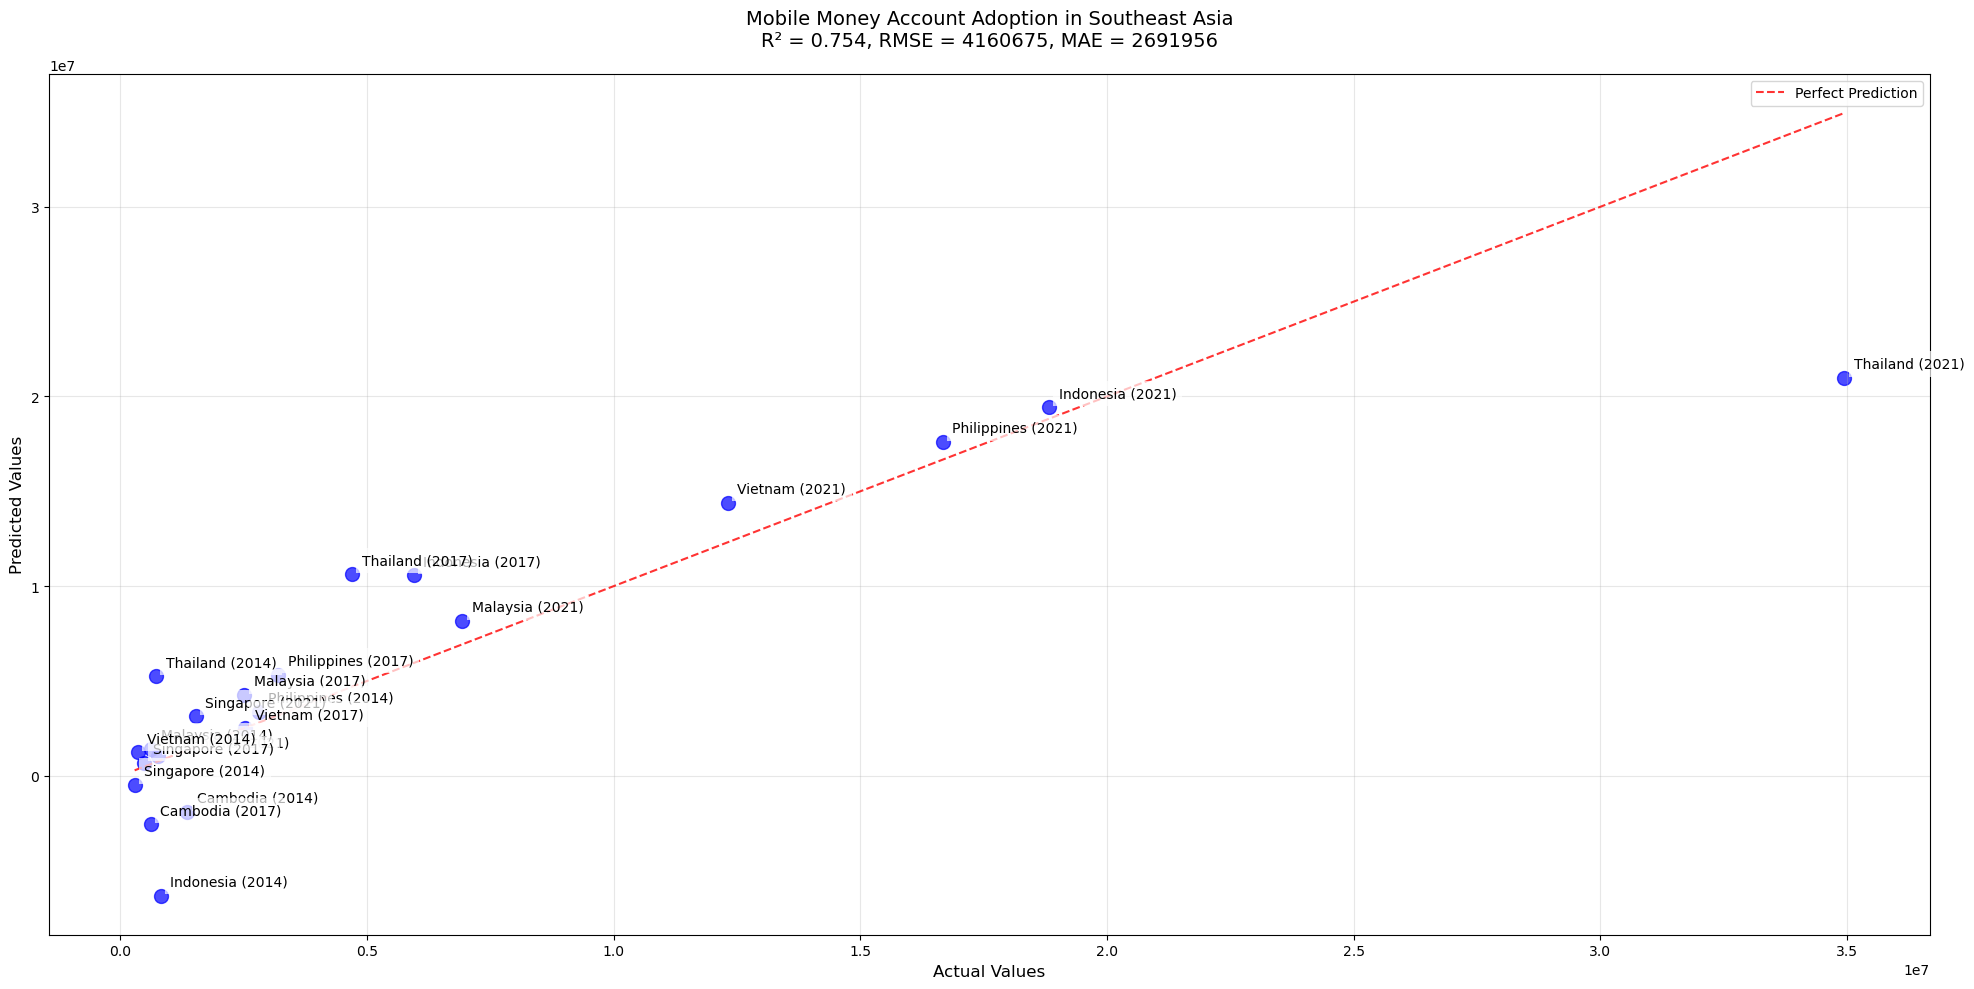

In [71]:
# Create visualization with improved formatting
plt.figure(figsize=(20, 10))

# Create scatter plot with larger points
plt.scatter(y_final.values, predictions, alpha=0.7, c='blue', s=100)

# Add country labels with better positioning and formatting
for i, idx in enumerate(X_final.index):
    country, year = idx
    plt.annotate(f"{country} ({year})", 
                (y_final.values[i], predictions[i]),
                xytext=(7, 7), 
                textcoords='offset points', 
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Add perfect prediction line
line = np.linspace(min(y_final), max(y_final), 100)
plt.plot(line, line, 'r--', alpha=0.8, label='Perfect Prediction')

# Format axes with scientific notation
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.title('Mobile Money Account Adoption in Southeast Asia\n' + 
          f'R² = {r2:.3f}, RMSE = {rmse:.0f}, MAE = {mae:.0f}', 
          fontsize=14, pad=20)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
# Load data
X = pd.read_parquet('mobile_banking_features.parquet')
y = pd.read_parquet('mobile_banking_target.parquet')

# Remove NaN values
mask = ~y.isna().any(axis=1)
X_clean = X[mask]
y_clean = y[mask]

# Define top performing features
top_features = [
    'Individuals using the Internet (% of population)',
    'Personal remittances, received (% of GDP)',
    'Total Account Holders'
]

# Create enhanced dataset with engineered features
X_enhanced = X_clean[top_features].copy()

# Apply proven feature transformations
X_enhanced['Internet_log'] = np.log1p(X_enhanced['Individuals using the Internet (% of population)'])
X_enhanced['Remittance_log'] = np.log1p(X_enhanced['Personal remittances, received (% of GDP)'])
X_enhanced['Accounts_log'] = np.log1p(X_enhanced['Total Account Holders'])
X_enhanced['Internet_exp'] = np.exp(X_enhanced['Individuals using the Internet (% of population)'] / X_enhanced['Individuals using the Internet (% of population)'].max())
X_enhanced['Combined_log'] = X_enhanced['Internet_log'] * X_enhanced['Remittance_log'] * X_enhanced['Accounts_log']
X_enhanced['Weighted_exp'] = X_enhanced['Internet_exp'] * (X_enhanced['Personal remittances, received (% of GDP)'] + X_enhanced['Total Account Holders']) / 2

# Scale features
scaler = StandardScaler()
X_enhanced_scaled = pd.DataFrame(
    scaler.fit_transform(X_enhanced),
    columns=X_enhanced.columns
)

# Fit model with optimal parameters
ridge_model = Ridge(alpha=1e-07)
ridge_model.fit(X_enhanced_scaled, y_clean)
predictions = ridge_model.predict(X_enhanced_scaled)

# Calculate performance metrics
r2 = r2_score(y_clean, predictions)
rmse = np.sqrt(mean_squared_error(y_clean, predictions))
mae = mean_absolute_error(y_clean, predictions)

print("\nModel Performance:")
print(f"Sample size: {len(y_clean)}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


Model Performance:
Sample size: 21
R² Score: 0.9248
RMSE: 2299345.75
MAE: 1603844.29


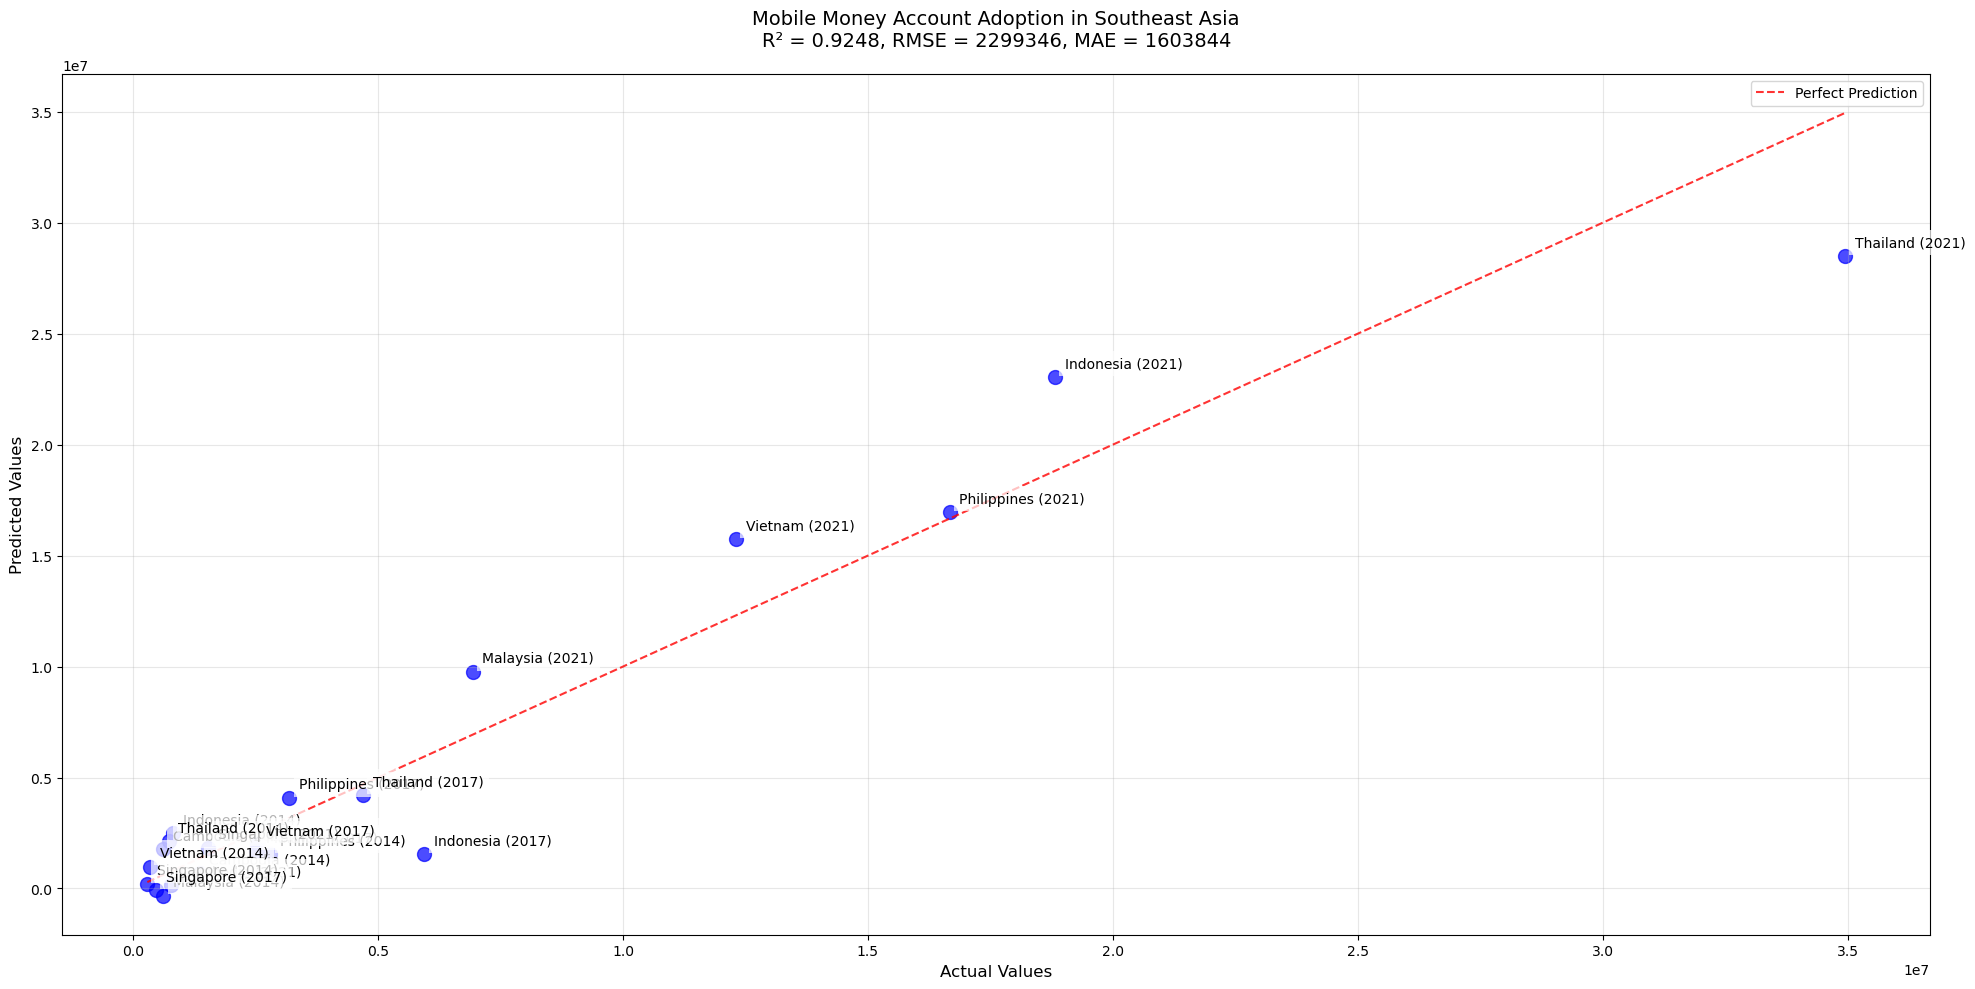

In [74]:
# Create visualization
plt.figure(figsize=(20, 10))
plt.scatter(y_clean['target'], predictions, alpha=0.7, c='blue', s=100)

# Add country labels
for i, idx in enumerate(X_clean.index):
    country, year = idx
    plt.annotate(f"{country} ({year})", 
                (y_clean['target'].values[i], predictions[i]),
                xytext=(7, 7), 
                textcoords='offset points', 
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Add perfect prediction line
line = np.linspace(min(y_clean['target']), max(y_clean['target']), 100)
plt.plot(line, line, 'r--', alpha=0.8, label='Perfect Prediction')

plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.title('Mobile Money Account Adoption in Southeast Asia\n' + 
          f'R² = {r2:.4f}, RMSE = {rmse:.0f}, MAE = {mae:.0f}', 
          fontsize=14, pad=20)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()